<a id ='2' ></a>
<h1 style = "color:gray;border:0;font-family:Tahoma;font-weight:bold">Loan Prediction System 🪙</h1>

<h3 style = "color:gray;border:0;font-family:Tahoma;font-weight:bold">Outline</h3>  

 - <p style = "color:gray;font-family:Tahoma;font-weight:lighter">Loading and Exploring the data</p>   
 - <p style = "color:gray;font-family:Tahoma;font-weight:lighter">Cleaning the Data</p>  
 - <p style = "color:gray;font-family:Tahoma;font-weight:lighter">Visualizing the Data</p>
 - <p style = "color:gray;font-family:Tahoma;font-weight:lighter">Encoding the Categorical Data</p>
 - <p style = "color:gray;font-family:Tahoma;font-weight:lighter">Model Development</p>

     - <p style = "color:gray;font-family:Tahoma;font-weight:lighter">Dividing the Data</p>
     - <p style = "color:gray;font-family:Tahoma;font-weight:lighter">Using GaussianNB</p>
     - <p style = "color:gray;font-family:Tahoma;font-weight:lighter">Loss Function</p>
     - <p style = "color:gray;font-family:Tahoma;font-weight:lighter">Using SVC With Grid Search CV</p>
     - <p style = "color:gray;font-family:Tahoma;font-weight:lighter">XGBoost Classifier</p>
     - <p style = "color:gray;font-family:Tahoma;font-weight:lighter">Decision Tree Using Randomized Search</p>
     - <p style = "color:gray;font-family:Tahoma;font-weight:lighter">Random Forest Using Randomized Search</p>
     
 - <p style = "color:gray;font-family:Tahoma;font-weight:lighter">Selecting and Saving the Model</p>

In [13]:
# Library that we need
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

📌 numpy: pustaka untuk array multidimensi, operasi numerik, dll <br>
📌 pandas: digunakan untuk manipulasi dan analisis DataFrame <br>
📌 seaborn: digunakan untuk visualisasi data

## Loading and Exploring the Data

In [14]:
# Loading the dataset
train_data = pd.read_csv("/content/train_u6lujuX_CVtuZ9i.csv")
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
# Shape of the dataset (total dataset, parameter dataset)
print(train_data.shape)

(614, 13)


In [16]:
# Information of the dataset according to the certain classification
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Cleaning the Data

In [17]:
# Loading the information of the dataset
train_data.info()
'''
train_data.info() digunakan untuk mendapatkan informasi tentang dataset yang digunakan, seperti jumlah
baris dan kolom, tipe data tiap kolom, serta jumlah nilai yang tidak kosong (non-null) pada setiap kolom.
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


'\ntrain_data.info() digunakan untuk mendapatkan informasi tentang dataset yang digunakan, seperti jumlah\nbaris dan kolom, tipe data tiap kolom, serta jumlah nilai yang tidak kosong (non-null) pada setiap kolom.\n'

In [18]:
# Searching the null values of the dataset
def missing_values(df):
    a = num_null_values = df.isnull().sum()
    return a

In [19]:
missing_values(train_data)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
# Dropping the unecessary columns
train_data.drop(['Loan_ID','Dependents'], axis=1, inplace=True)

In [21]:
train_data

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [22]:
# Dealing with null values (categorical)
cols = train_data[["Gender", "Married", "Self_Employed"]]
for  i in cols:
    train_data[i].fillna(train_data[i].mode().iloc[0], inplace=True)

In [23]:
train_data.isnull().sum()

Gender                0
Married               0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
# Dealing with Numerical Values missing_data
n_cols = train_data[["LoanAmount", "Loan_Amount_Term", "Credit_History"]]
for i in n_cols:
    train_data[i].fillna(train_data[i].mean(axis=0), inplace=True)

In [25]:
train_data.isnull().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Visualizing the Data

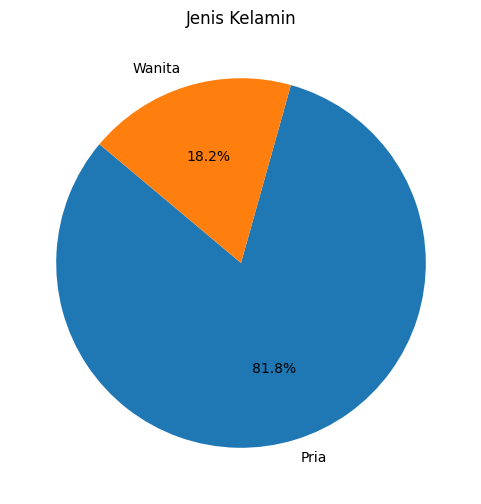

In [26]:
import matplotlib.pyplot as plt

# Data
categories = train_data['Gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(categories, labels=["Pria", "Wanita"], autopct='%1.1f%%', startangle=140)

# Optional: Add a title
plt.title("Jenis Kelamin")

# Display the pie chart
plt.show()


In [27]:
# Making a Story Board
def bar_chart(col):
    Approved = train_data[train_data["Loan_Status"]=="Y"][col].value_counts()
    Disapproved = train_data[train_data["Loan_Status"]=="N"][col].value_counts()

    df1 = pd.DataFrame([Approved, Disapproved])
    df1.index = ["Approved", "Disapproved"]
    ax = df1.plot(kind="bar")

    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

    plt.xlabel(col)  # Add x-axis label
    plt.ylabel("Jumlah")  # Add y-axis label (replace with the appropriate label)
    plt.title(f"{col} berdasarkan Status Pinjaman")  # Add a title (replace with the appropriate title)
    plt.legend(title="Status Pinjaman")
    plt.show()


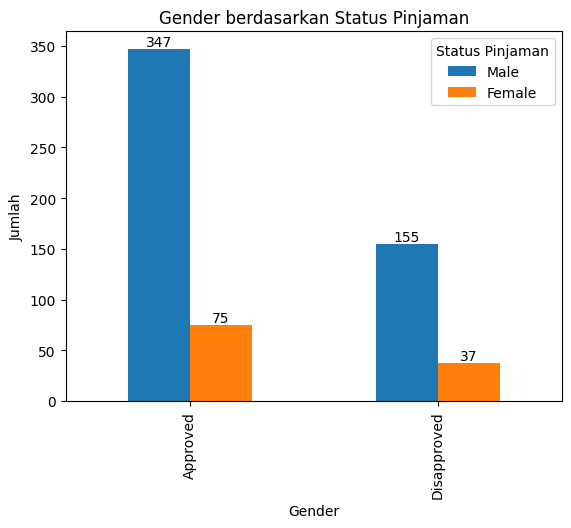

In [28]:
bar_chart("Gender")

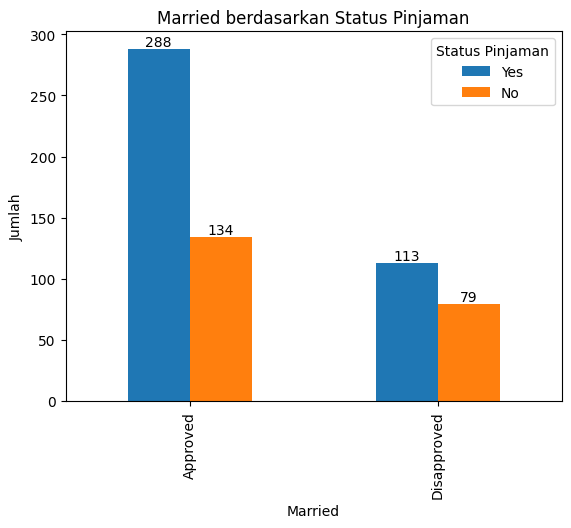

In [29]:
bar_chart("Married")

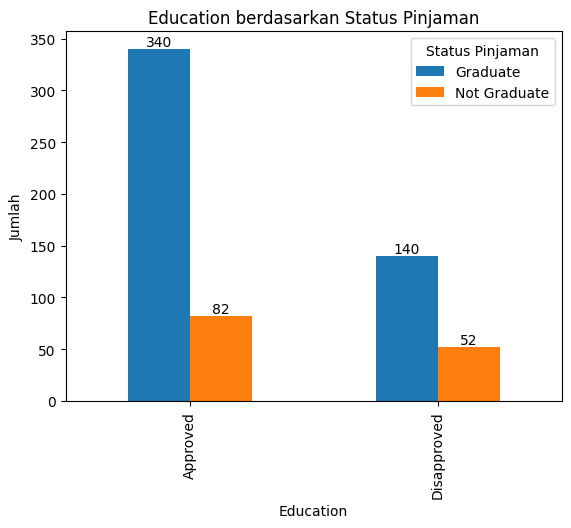

In [30]:
bar_chart("Education")

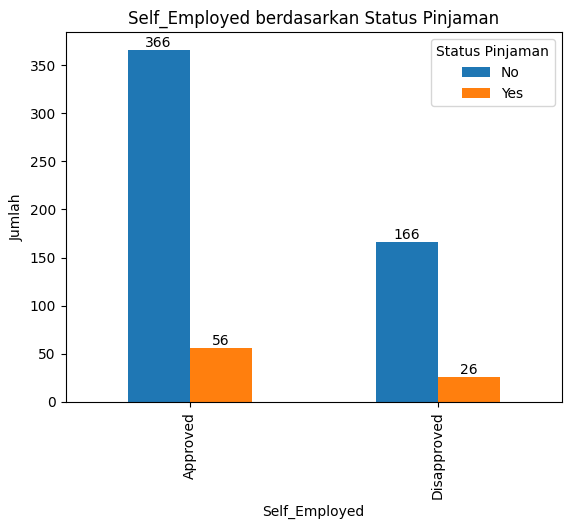

In [31]:
bar_chart("Self_Employed")

## Encoding the Categorical Data

In [32]:
# Encoding the categorical data
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
train_data[["Gender",'Married','Education','Self_Employed','Property_Area','Loan_Status']] = ord_enc.fit_transform(train_data[["Gender",'Married','Education','Self_Employed','Property_Area','Loan_Status']])
train_data.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0


In [33]:
# Convert data type to integer
train_data[["Gender",'Married','Education','Self_Employed','Property_Area','Loan_Status']] = train_data[["Gender",'Married','Education','Self_Employed','Property_Area','Loan_Status']].astype('int')

In [34]:
train_data

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,0,0,7583,0.0,187.000000,360.0,1.0,2,1


## Model Development

### ৹ Deviding the Data

In [35]:
from sklearn.model_selection import train_test_split
X = train_data.drop(columns="Loan_Status")
y = train_data["Loan_Status"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(491, 10)
(491,)
(123, 10)
(123,)


### ৹ Using GaussianNB

In [58]:
from sklearn.naive_bayes import BernoulliNB

gfc = BernoulliNB()
gfc.fit(X_train, y_train)
pred10 = gfc.predict(X_test)


In [57]:
from sklearn.naive_bayes import GaussianNB

gfc = GaussianNB()
gfc.fit(X_train, y_train)
pred1 = gfc.predict(X_test)

In [59]:
X_test

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
414,0,1,1,0,2149,3237.0,178.0,360.0,0.0,1
569,1,1,0,0,3166,2064.0,104.0,360.0,0.0,2
265,1,0,0,0,4095,3447.0,151.0,360.0,1.0,0
84,1,1,0,0,3988,0.0,50.0,240.0,1.0,2
109,1,1,1,0,2071,754.0,94.0,480.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...
152,1,0,0,0,9166,0.0,244.0,360.0,1.0,2
589,1,1,0,1,2726,0.0,106.0,360.0,0.0,1
123,1,1,0,0,2957,0.0,81.0,360.0,1.0,1
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2


In [60]:
# pred1 → prediction for particular data is approved or not
pred10

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1])

### ৹ Loss Function

In [64]:
# Checking the Accuracy
from sklearn.metrics import precision_score, recall_score, accuracy_score

def loss(y_true, y_pred):
    pre=  precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)

    print(pre)
    print(rec)
    print(acc)

accuracy = accuracy_score(y_test, pred10)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 77.24%


In [62]:
loss(y_test, pred1)

0.7766990291262136
0.9523809523809523
0.7804878048780488


### ৹ Using SVC with Grid Search CV

In [41]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Defining Parameter Range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose =3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.687 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.687 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.687 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [42]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [43]:
svc = SVC(C= 0.1, gamma= 1, kernel= 'rbf')
svc.fit(X_train, y_train)
pred2 = svc.predict(X_test)
loss(y_test,pred2)

accuracy = accuracy_score(y_test, pred2)
print(f'Accuracy: {accuracy * 100:.2f}%')

0.6829268292682927
1.0
0.6829268292682927
Accuracy: 68.29%


### ৹ XGBoost Classifier

📌 Install XGBoost → pip install xgboost

In [44]:
from xgboost import XGBClassifier

xgb = XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb.fit(X_train, y_train)
pred3 = xgb.predict(X_test)
loss(y_test, pred3)

0.797752808988764
0.8452380952380952
0.7479674796747967


### ৹ Decision Tree Using Randomized Search

In [45]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import RandomizedSearchCV

def randomized_search(params, runs=20, clf=DecisionTreeClassifier(random_state=2)):
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2)
    rand_clf.fit(X_train, y_train)
    best_model = rand_clf.best_estimator_

    # Extract Best Score
    best_score = rand_clf.best_score_

    # Print Best Score
    print("Training score: {:.3f}".format(best_score))

    # Predict Test Set Labels
    y_pred = best_model.predict(X_test)

    # Compute Accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print Accuracy
    print('Test score: {:.3f}'.format(accuracy))

    return best_model


In [46]:
randomized_search(params={'criterion':['entropy', 'gini'],
                              'splitter':['random', 'best'],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01],
                          'min_samples_split':[2, 3, 4, 5, 6, 8, 10],
                          'min_samples_leaf':[1, 0.01, 0.02, 0.03, 0.04],
                          'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
                          'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
                          'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
                          'max_depth':[None, 2,4,6,8],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]
                         })

Training score: 0.819
Test score: 0.772


DecisionTreeClassifier(max_depth=8, max_features=0.9, max_leaf_nodes=30,
                       min_impurity_decrease=0.05, min_samples_leaf=0.02,
                       min_samples_split=10, min_weight_fraction_leaf=0.005,
                       random_state=2, splitter='random')

In [47]:
ds = DecisionTreeClassifier(max_depth=8, max_features=0.9, max_leaf_nodes=30,
                       min_impurity_decrease=0.05, min_samples_leaf=0.02,
                       min_samples_split=10, min_weight_fraction_leaf=0.005,
                       random_state=2, splitter='random')
ds.fit(X_train, y_train)
pred4 = ds.predict(X_test)
loss(y_test, pred4)

accuracy = accuracy_score(y_test, pred4)

print(f'Accuracy: {accuracy * 100:.2f}%')

0.7592592592592593
0.9761904761904762
0.7723577235772358
Accuracy: 77.24%


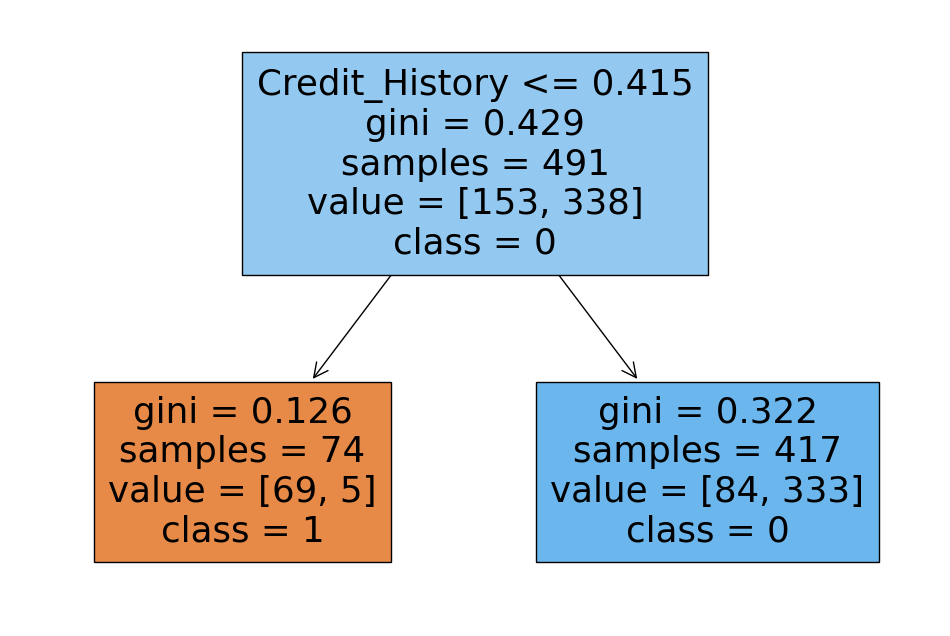

In [48]:
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt

# Assuming you've already trained the Decision Tree model and evaluated it

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(ds, filled=True, feature_names=X_train.columns, class_names=["1","0"])
plt.show()


In [49]:
from sklearn.tree import export_graphviz
export_graphviz (ds, out_file="tree_stroke.dot", class_names=["1","0"], feature_names=X.columns, impurity=False, filled=True)

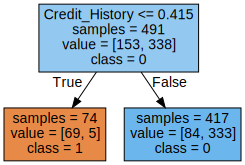

In [50]:
from xgboost.plotting import GraphvizSource
import graphviz

with open ("tree_stroke.dot") as fig:
  dot_graph = fig.read()
graphviz.Source(dot_graph)

### ৹ Random Forest Using Randomized Search

In [51]:
from sklearn.ensemble import RandomForestClassifier

randomized_search(params={
                         'min_samples_leaf':[1,2,4,6,8,10,20,30],
                          'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
                          'max_features':['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
                          'max_depth':[None,2,4,6,8,10,20],
                         }, clf=RandomForestClassifier(random_state=2))

Training score: 0.819
Test score: 0.772


RandomForestClassifier(max_depth=2, max_features=0.5,
                       min_impurity_decrease=0.01, min_samples_leaf=10,
                       random_state=2)

## Selecting and Saving the Model

In [52]:
import joblib
joblib.dump(ds, "model.pkl")
model = joblib.load('model.pkl' )
model.predict(X_test)

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1])